In [52]:
from sklearn import datasets
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report,confusion_matrix

In [53]:
faces = datasets.fetch_lfw_people(min_faces_per_person = 100, resize = 0.4)
faces.keys()

dict_keys(['data', 'images', 'target', 'target_names', 'DESCR'])

In [54]:
faces.data.shape

(1140, 1850)

In [55]:
faces.images.shape

(1140, 50, 37)

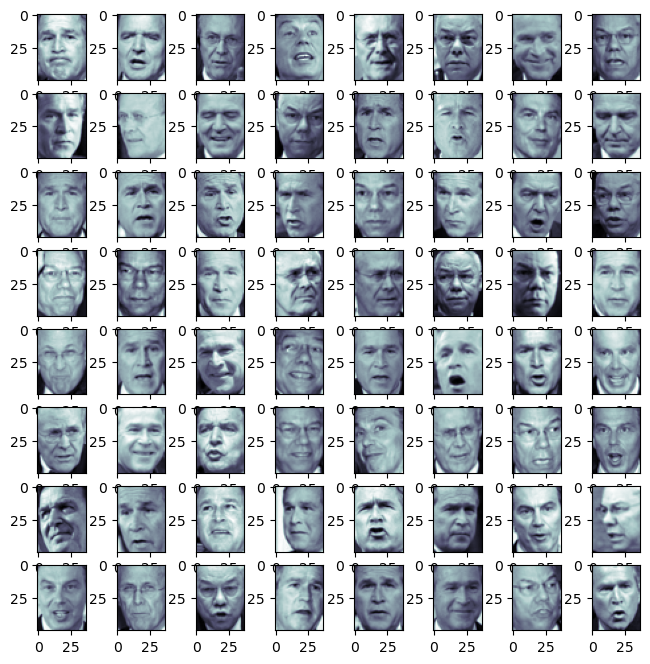

In [56]:
fig = plt.figure(figsize=(8,8))
for i in range(64):
    ax = fig.add_subplot(8,8,i+1)
    ax.imshow(faces.images[i],cmap=plt.cm.bone)
plt.show()

In [57]:
x,y = faces.data, faces.target

In [58]:
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state = 0)
pca1 = PCA()
pca1.fit(x_train)

PCA()

In [59]:
k = 0
total = 0
while total < 0.99:
    total = total + pca1.explained_variance_ratio_[k]
    k += 1
k

357

In [60]:
pca2 = PCA(n_components=k, whiten = True)
x_transformed = pca2.fit_transform(x_train)
x_transformed.shape

(855, 357)

In [61]:
x_approx = pca2.inverse_transform(x_transformed)
x_approx_image = x_approx.reshape((855,50,37))

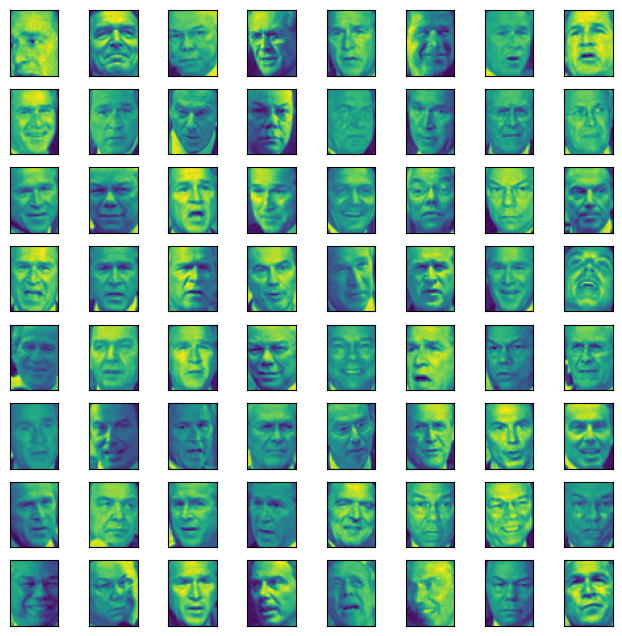

In [62]:
fig = plt.figure(figsize=(8,8))
for i in range(64):
    ax = fig.add_subplot(8,8,i+1,xticks=[],yticks=[])
    ax.imshow(x_approx_image[i])
plt.show()

In [63]:
pca2.components_.shape

(357, 1850)

In [64]:
eigenv = pca2.components_.reshape((k,50,37))

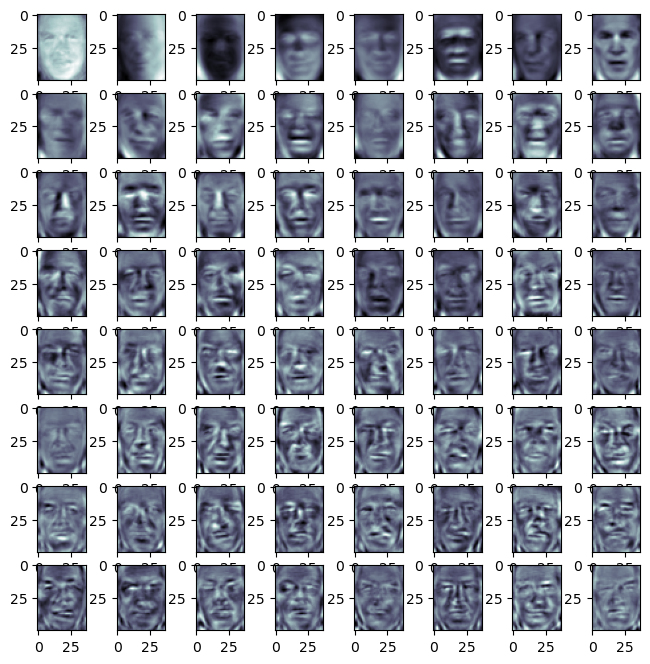

In [65]:
fig = plt.figure(figsize=(8,8))
for i in range(64):
    ax = fig.add_subplot(8,8,i+1)
    ax.imshow(eigenv[i],cmap = plt.cm.bone)
plt.show()

In [66]:
x_train_pca = x_transformed
x_test_pca = pca2.transform(x_test)

In [67]:
rf = RandomForestClassifier()
rf.fit(x_train,y_train)
y_predict = rf.predict(x_test)

In [68]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.86      0.69      0.76        61
           1       0.80      0.11      0.20        36
           2       0.57      1.00      0.72       122
           3       1.00      0.10      0.18        31
           4       0.85      0.31      0.46        35

    accuracy                           0.64       285
   macro avg       0.81      0.44      0.46       285
weighted avg       0.74      0.64      0.57       285



In [70]:
print(confusion_matrix(y_test,y_predict))

[[ 42   0  19   0   0]
 [  4   4  27   0   1]
 [  0   0 122   0   0]
 [  1   1  25   3   1]
 [  2   0  22   0  11]]


In [71]:
from sklearn import svm
clf = svm.SVC(kernel='linear')
clf.fit(x_train,y_train)

SVC(kernel='linear')

In [72]:
y_pred = clf.predict(x_test)

In [73]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.90      0.92      0.91        61
           1       0.90      0.72      0.80        36
           2       0.87      0.94      0.91       122
           3       0.93      0.81      0.86        31
           4       0.86      0.86      0.86        35

    accuracy                           0.88       285
   macro avg       0.89      0.85      0.87       285
weighted avg       0.89      0.88      0.88       285

